# 연관분석

- 장바구니 분석 or 서열분석이라고 불린다.

## 1. 연관분석 측도

### 지지도(support) 

- 전체 거래 중 항목 A와 항목 B를 동시에 포함하는 거래의 비율
- (A와 B 동시에 포함된 거래수) / 전체 거래수

### 신뢰도(Confidence)

- 항목 A를 포함한 거래 중에서 항목 A와 항목 B가 같이 포함될 확률, 연관성의 정도를 파악할 수 있다.
- (A와 B가 동시에 포함된 거래수) / A를 포함하는 거래수


### 향상도(Lift)

- A가 주어지지 않았을 때의 품목 B의 확률에 비해 A가 주어졌을 때의 품목 B의 증가 비율. 품목A와 품목B가 구매가 서로 관련이 없는 경우에 향상도는 1이 된다.
- (A와 Brk 동시에 포함된 거래수) / A를 포함하는 거래수 X B를 포함하는 거래수

- 1이라면 우연적인 경우로, x와 y의 관계가 독립이지만, 1보다 크거나 작다면 우연이 아닌 필연적인 관계에 있음.

### 2. 연관규칙 절차

- 최소 지지도보다 큰 집합만을 대상으로 높은 지지도 갖는 품목 집합을 찾는 것이다.
- 처음에 5%로 잡고 규칙이 충분히 도출되는지를 보고 다양하게 조절하여 시도

### 3. 연관규칙의 장점

- 탐색적인 기법
- 강력한 비목적성 분석기법 : 목적변수가 없으므로 유용하게 활용
- 사용이 편리한 분석 데이터의 형태
- 계산의 용이성

### 4. 단점

- 상당한 수의 계산 과정(유사한 품목을 한 범주로 일반화(이러면 요인이나 PCA로 묶을 수 있을 것 같다는 생각이 든다.)
- 적절한 품목의 결정 : 너무 세분화 -> 의미 없는 분석이 될 수도 있다.
- 품목의 비율차이 : 거래량이 적은 품목은 거래수가 적을 것이고 당연히 규칙 발견 시 제외하기 쉽다.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import itertools
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
import networkx as nx

from wordcloud import WordCloud


plt.rc('font',family = 'Malgun Gothic')
plt.rc('axes',unicode_minus = False)


In [19]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [22]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,frozen smoothie,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [ ]:
plt.figure(figsize = (15,15))

wordcloud = WordCloud(background_color='white',width=1200,height=1200,max_words=121).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Popular Items",fontsize = 15)
plt.show()

<AxesSubplot:>

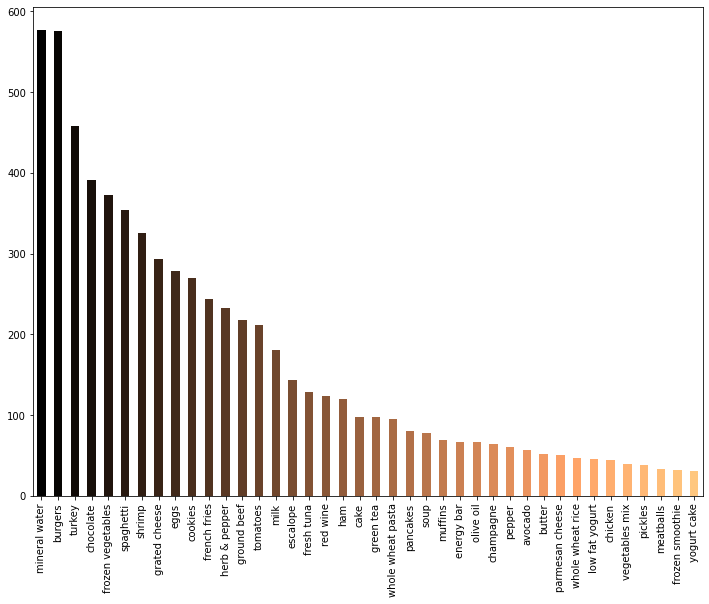

In [32]:
plt.figure(figsize = (12,9))
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)

In [34]:
y = df[0].value_counts().head(50).to_frame()

In [43]:
df['food'] = 'Food'

In [52]:
food = df.truncate(before=0,after=15)
food = nx.from_pandas_edgelist(food,source='food',target = 0, edge_attr=True)

In [56]:

df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

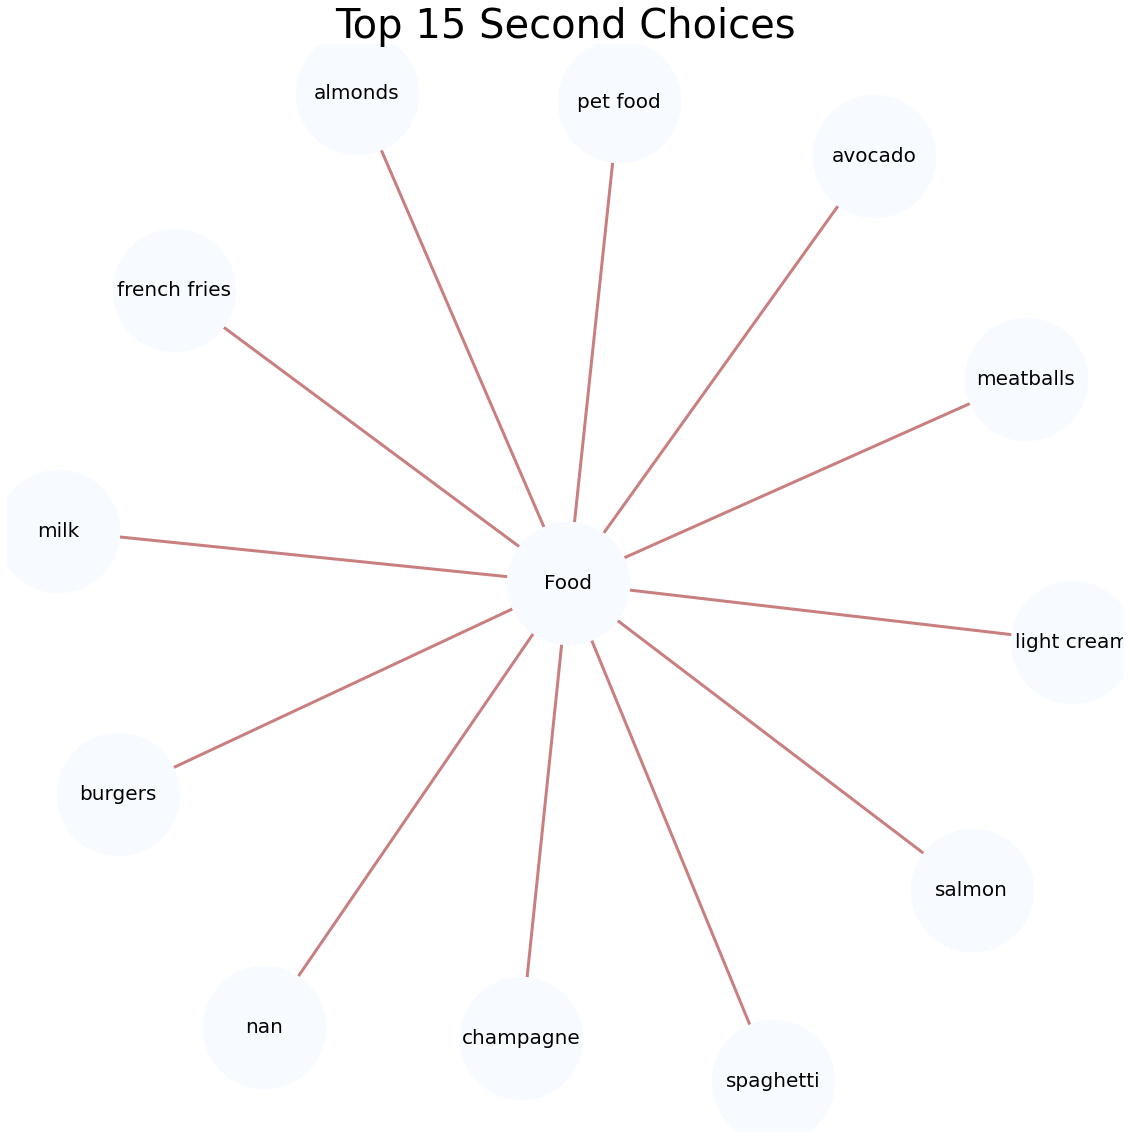

In [57]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [59]:
trans_list = []
for i in range(len(df)) :
    trans_list.append([str(df.values[i,j]) for j in range(0, 20)])

In [62]:
trans = np.array(trans_list)

In [64]:
trans.shape

(7501, 20)

In [65]:
te =TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data,columns=te.columns_)

In [72]:
frequent_itemsets = apriori(data,min_support=0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

## 실습

In [2]:
info_df = pd.read_csv('한국소비자원 소비자 피해구제 정보_20210413.csv',encoding='cp949')

In [3]:
info_df.rename(columns={"접수일(년월일)" : "접수일"},inplace = True)

In [4]:
info_df['접수일'] = pd.to_datetime(info_df['접수일'])

In [5]:
info_df = info_df.iloc[:,1:]

In [6]:
import re

In [7]:
info_df = info_df.loc[(info_df['연령대'] != '불명') & (info_df['연령대'] != '(미입력)')].reset_index(drop = True)

In [188]:
info_df['연령대'].value_counts()

30 - 39세       3457
40 - 49세       2760
50 - 59세       1904
20 - 29세       1862
60 - 64세        601
65 - 69세        342
70 - 79세        299
80세이상            60
10 - 19세         54
10세 미만            4
(구)60 - 69세       2
Name: 연령대, dtype: int64

- 100대가 아닌 80세이상, 10대, 10세 미만은 제거(구 60-69는 60대로 합침)

In [8]:
del_list = info_df['연령대'].value_counts()[7:-1].index.to_list()

In [9]:
info_df = info_df.query("연령대 not in @del_list").reset_index(drop = True)

In [10]:
info_df['연령대'] = [str(re.findall('\d',age.split(' ')[0])[0])+'0대' for age in info_df['연령대']]

In [11]:
info_df['성별_연령대_지역'] = info_df['성별'] + " " + info_df['연령대'] + " " + info_df['지역']

In [12]:
new_df = info_df[['성별_연령대_지역','판매유형']].dropna().reset_index(drop = True)

In [13]:
new_df['판매유형'] = [re.sub(r'\([^)]*\)', '', new_df['판매유형'][i]) for i in range(len(new_df))]

In [14]:
data_list = [[] for i in range(len(new_df))]

for i,v in enumerate(new_df['성별_연령대_지역']) :
    data_list[new_df.index[i]].append(v)
    
for i,v in enumerate(new_df['판매유형']) :
    data_list[new_df.index[i]].append(v)

In [15]:
te = TransactionEncoder()
te_array = te.fit(data_list).transform(data_list)
apriori_df = pd.DataFrame(te_array,columns=te.columns_)

In [16]:
frequent_itemsets = apriori(apriori_df,min_support=0.01,use_colnames=True)

In [17]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [18]:
frequent_itemsets.loc[frequent_itemsets['length']>=2,]

,support,itemsets,length
28,0.011859,"(남성 30대 경기도, 국내온라인거래)",2
29,0.011324,"(국내온라인거래, 남성 30대 서울특별시)",2
30,0.012751,"(국내온라인거래, 여성 30대 경기도)",2
31,0.015604,"(여성 30대 서울특별시, 국내온라인거래)",2
32,0.016139,"(일반판매, 남성 30대 경기도)",2
33,0.015872,"(일반판매, 남성 30대 서울특별시)",2
34,0.011502,"(일반판매, 남성 40대 경기도)",2
35,0.011859,"(일반판매, 남성 40대 서울특별시)",2
36,0.015782,"(일반판매, 여성 20대 경기도)",2
37,0.015604,"(일반판매, 여성 20대 서울특별시)",2


#### 향상도 기준으로 향상도 1인 이상 애들 추출

In [19]:
as_df = association_rules(frequent_itemsets,metric='lift',min_threshold=1).sort_values(by='lift',ascending = False)

- antecedents는 조건절, consequents는 결과절
- 만일 조건절이라면 결과절

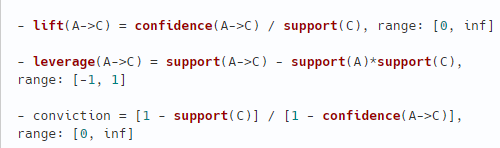

- conviction : C없이 A가 발생한 비율(찾아낸 규칙이 얼마나 잘못되었는지를 확인)
- leverage : 동일한 데이터 집합에서 선행사건과 후행사건이 동시에 나타나는 종속적인 값을 측정

In [21]:
text = str(new_df['판매유형'].to_list())

In [ ]:
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='white',width=1200,height=1200,font_path='C:\Windows\Fonts\H2GPRM.ttf').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("판매유형",fontsize = 15)
plt.show()

In [ ]:
food = df.truncate(before=0,after=15)
food = nx.from_pandas_edgelist(food,source='food',target = 0, edge_attr=True)
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [109]:
node_df = pd.DataFrame(Counter(new_df['성별_연령대_지역']).items(),columns=['node','nodesize'])

In [110]:
node_df['특성'] = '특성'

In [111]:
node_df = node_df.sort_values(by='nodesize',ascending = False)[:15]

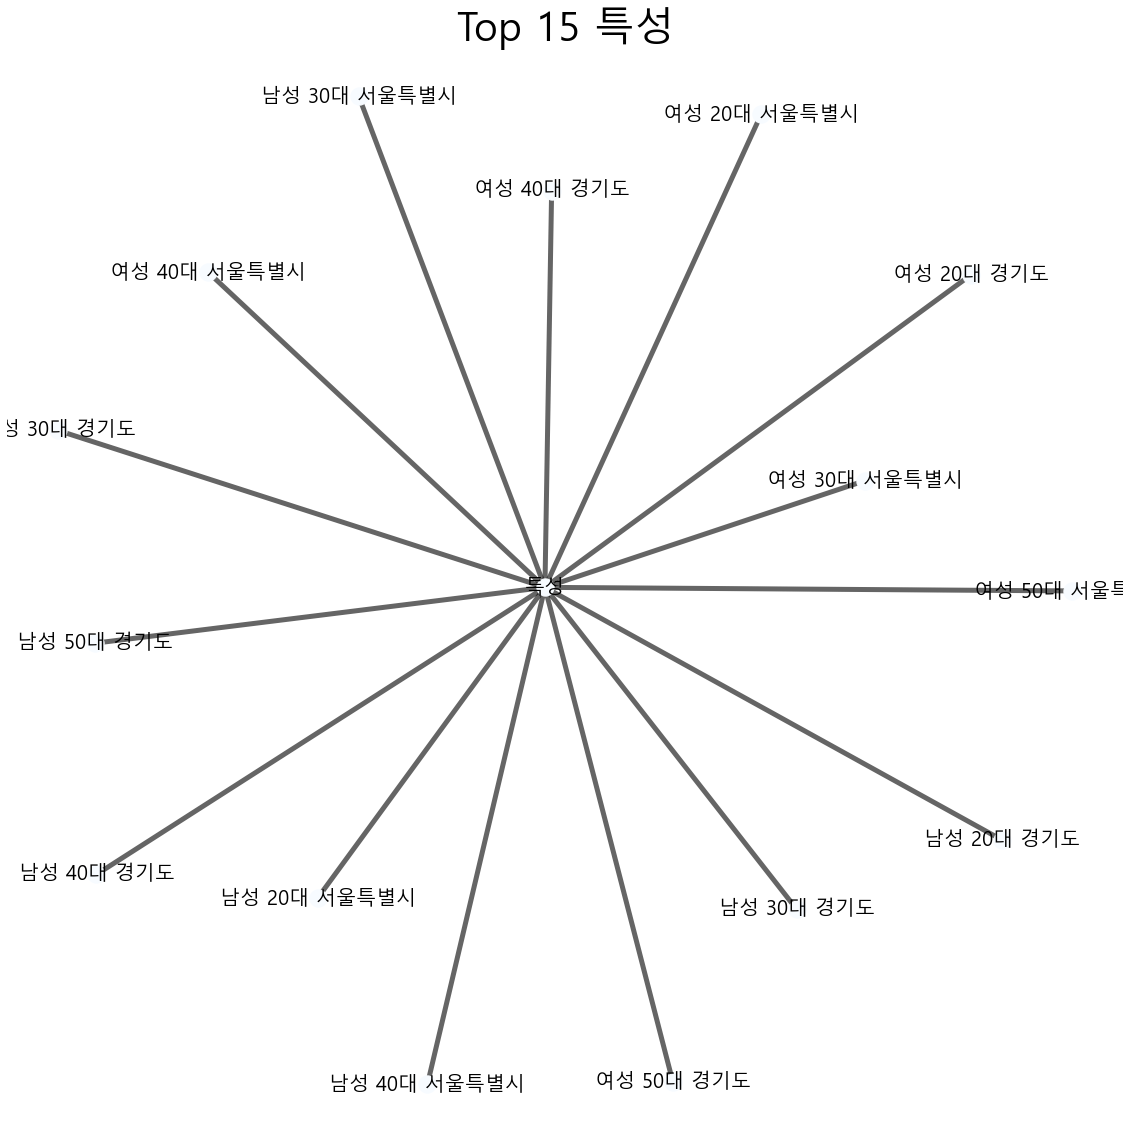

In [105]:
personal = nx.from_pandas_edgelist(node_df,source = '특성',target = 'node',edge_attr=True)
pos = nx.spring_layout(personal)
color = plt.cm.Blues(np.linspace(0, 15, 1))
plt.rcParams['figure.figsize'] = (20, 20)
nx.draw_networkx_nodes(personal,pos,node_color= color)
nx.draw_networkx_edges(personal,pos, width = 5, alpha = 0.6, color = 'brown')
nx.draw_networkx_labels(personal, pos, font_size = 20, font_family='Malgun Gothic')
plt.axis('off')
plt.grid()
plt.title('Top 15 특성', fontsize = 40)
plt.show()